In [1]:
!pip install quandl
import quandl
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy.stats import *
import pandas as pd
from mpl_toolkits.mplot3d.axes3d import Axes3D
!pip install QuantLib
%config IPCompleter.greedy = True
from QuantLib import *
from collections import namedtuple
import math
date = '2020-11-20'
TTM = list(np.arange(0, 30.5, 0.5))
quandl.ApiConfig.api_key = "sAyfjP-zzwW8eWktkXq3" 

     |████████████████████████████████| 18.8MB 242kB/s 


### Implementation

In [2]:
def Yield():
  y = [0.1332, 0.2679, 0.4679, 0.6824, 0.8859, 1.0675, 1.2241, 1.3569, 1.469, 1.5641, 1.6456, 1.7167, 1.78, 
       1.8374, 1.8907, 1.9408, 1.9887, 2.0349, 2.0797, 2.1234, 2.166, 2.2077, 2.2483, 2.288, 2.3265, 2.364, 
       2.4003, 2.4354, 2.4692, 2.5017]
  return y

# def BondPrice():
#   P = []
#   for i in range(1, len(TTM)):
#     P.append(exp(-y[i]*TTM[i]))
#   return P

def volatility():
  df = pd.read_excel('/content/drive/MyDrive/CityU Study/Yr4 Sem A/EF4821/Project/swaption volatility.xlsx')
  df = df.set_index('Expiry')
  df.set_axis([i for i in range(1, 11)], axis=1, inplace=True)
  df.set_axis([i for i in range(1, 11)], axis=0, inplace=True)
  vol = df.values.tolist()
  for i in range(0, 10):
    for k in range(0, 10):
      vol[i][k]*=0.01
  vol = np.reshape(vol, (10,10))
  return vol

# def swap_rate_and_market_price():
#   swap_rate = []
#   P_mkt = []
#   for i in range(0, 10):
#     rate = []
#     price = []
#     for k in range(0, 10):
#       sum = 0
#       for j in range(2*(i+1), 2*(i+k+1)+2):
#         sum+=P[j]
#       r = (P[2*(i+1)-1]-P[2*(i+k+1)])/(0.5*sum)
#       rate.append(r)
#       d1 = (log(P[2*(i+1)-1]-P[2*(i+k+1)])-log(r*sum)+1/2*vol[i,k]*(k+1))/(vol[i,k]*sqrt(k+1))
#       d2 = d1 - vol[i,k]*sqrt(k+1)
#       Nd1 = norm.cdf(d1)
#       Nd2 = norm.cdf(d2)
#       price.append(P[2*(i+1)-1]-P[2*(i+k+1)]*Nd1 - r*0.5*sum*Nd2)
#     swap_rate.append(rate)
#     P_mkt.append(price)
#   swap_rate = np.reshape(swap_rate, (10, 10))
#   P_mkt = np.reshape(P_mkt, (10, 10))
#   return swap_rate, P_mkt

In [3]:
y = [0.1332, 0.2679, 0.4679, 0.6824, 0.8859, 1.0675, 1.2241, 1.3569, 1.469, 1.5641, 1.6456, 1.7167, 1.78, 
       1.8374, 1.8907, 1.9408, 1.9887, 2.0349, 2.0797, 2.1234, 2.166, 2.2077, 2.2483, 2.288, 2.3265, 2.364, 
       2.4003, 2.4354, 2.4692, 2.5017]
y = [i*0.01 for i in y]
print(y)
# plt.plot(TTM, y)

[0.001332, 0.0026790000000000004, 0.004679, 0.006824, 0.008859, 0.010674999999999999, 0.012241, 0.013569, 0.014690000000000002, 0.015641000000000002, 0.016456, 0.017166999999999998, 0.0178, 0.018373999999999998, 0.018907, 0.019408, 0.019887, 0.020349, 0.020797, 0.021234000000000003, 0.02166, 0.022077, 0.022483, 0.022879999999999998, 0.023264999999999997, 0.023639999999999998, 0.024003, 0.024354, 0.024692, 0.025017]


In [4]:
# P = BondPrice()
# print(P)
# plt.plot(TTM[1:], P)

In [5]:
vol = volatility()
vol

array([[0.5555, 0.6186, 0.6605, 0.6938, 0.6781, 0.6676, 0.6121, 0.6238,
        0.5978, 0.5889],
       [0.6502, 0.6745, 0.66  , 0.6324, 0.6192, 0.6088, 0.5646, 0.5757,
        0.5651, 0.5353],
       [0.7083, 0.6462, 0.6432, 0.5845, 0.572 , 0.5509, 0.5457, 0.5252,
        0.516 , 0.5048],
       [0.6435, 0.5665, 0.5491, 0.5448, 0.5163, 0.5084, 0.4881, 0.4878,
        0.4833, 0.4736],
       [0.5626, 0.5273, 0.5063, 0.4973, 0.4742, 0.4776, 0.4559, 0.4619,
        0.4586, 0.447 ],
       [0.5308, 0.5008, 0.42  , 0.4597, 0.4515, 0.4586, 0.4441, 0.4149,
        0.4442, 0.408 ],
       [0.5048, 0.4664, 0.4457, 0.4312, 0.4159, 0.4423, 0.4158, 0.43  ,
        0.428 , 0.4289],
       [0.4675, 0.4413, 0.4428, 0.4225, 0.423 , 0.385 , 0.3842, 0.3833,
        0.4164, 0.4151],
       [0.4419, 0.4112, 0.4239, 0.4164, 0.3817, 0.4212, 0.38  , 0.412 ,
        0.4116, 0.412 ],
       [0.4262, 0.4311, 0.3823, 0.3349, 0.3932, 0.4152, 0.3431, 0.4129,
        0.4126, 0.4023]])

In [6]:
# swap_rate, P_mkt = swap_rate_and_market_price()
# print(swap_rate)
# print(P_mkt)

In [7]:
# plt.plot(list(range(1, 11)), swap_rate[0])

In [8]:
# plt.plot(list(range(1, 11)), P_mkt[0])

### Method 1

In [ ]:
class ModelCalibrator:
    def __init__(self, endCriteria):        
        self.endCriteria = endCriteria
        self.helpers = []

    def AddCalibrationHelper(self, helper):
        self.helpers.append(helper)

    def Calibrate(self, model, engine, curve, fixedParameters):
        # assign pricing engine to all calibration helpers
        for i in range(len(self.helpers)):
            self.helpers[i].setPricingEngine(engine)
        method = LevenbergMarquardt()
        model.calibrate(self.helpers, method, self.endCriteria)

In [ ]:
len(dates)
len(y)

30

In [ ]:

today = Date(20, 11, 2020)
Settings.instance().evaluationDate = today
curve = ZeroCurve(dates, y, Actual365Fixed())
term_structure = YieldTermStructureHandle(curve)
endCriteria = EndCriteria(1000000, 100, 0.000001, 0.00000001, 0.00000001)
calibrator = ModelCalibrator(endCriteria)
dayCounter = Actual360()

In [ ]:
swaptions = []
for i in range(len(vol)):
  for j in range(len(vol[0])):
    t = i + 1; tenor = j+1   
    helper = SwaptionHelper(
        Period(t, Years), 
        Period(tenor, Years), 
        QuoteHandle(SimpleQuote(vol[i][j])), 
        USDLibor(Period(6, Months), term_structure), 
        Period(1, Years), 
        dayCounter, 
        dayCounter, 
        term_structure, 
        )    
    calibrator.AddCalibrationHelper(helper)
    helper.setPricingEngine(engine)
    swaptions.append(helper)

In [ ]:
# create model and pricing engine, calibrate model and print calibrated parameters
print('calibrate all involved parameters (HW1F : reversion, sigma)')
model = HullWhite(term_structure)
engine = JamshidianSwaptionEngine(model)
fixedParameters = []
calibrator.Calibrate(model, engine, term_structure, fixedParameters)
print('calibrated reversion: ' + str(round(model.params()[0], 5)))
print('calibrated sigma: ' + str(round(model.params()[1], 5)))
print()

case 1 : calibrate all involved parameters (HW1F : reversion, sigma)
calibrated reversion: 0.00066
calibrated sigma: 0.38298



In [ ]:
def calibration_report(swaptions, data):
    print ("-"*82)
    print ("%15s %15s %15s %15s %15s" % ("Model Price", "Market Price", "Implied Vol", "Market Vol", "Rel Error"))
    print ("-"*82)
    cum_err = 0.0
    for i, s in enumerate(swaptions):
        model_price = s.modelValue()
        market_vol = data[i].volatility
        black_price = s.blackPrice(market_vol)
        rel_error = model_price/black_price - 1.0
        implied_vol = s.impliedVolatility(model_price, 1e-5, 100, 0.0, 1.0)
        rel_error2 = implied_vol/market_vol-1.0
        cum_err += rel_error2*rel_error2
        
        print ("%15.5f %15.5f %15.5f %15.5f %15.5f" % (model_price, black_price, implied_vol, market_vol, rel_error))
    print ("-"*82)
    print ("Cumulative Error : %15.5f" % math.sqrt(cum_err))

In [ ]:
calibration_report(swaptions, data)

----------------------------------------------------------------------------------
    Model Price    Market Price     Implied Vol      Market Vol       Rel Error
----------------------------------------------------------------------------------
        0.12937         0.06706         1.16391         0.55550         0.92921
        0.21182         0.15759         0.85510         0.61860         0.34412
        0.24197         0.23686         0.67590         0.66050         0.02161
        0.24246         0.29049         0.57188         0.69380        -0.16533
        0.23593         0.30361         0.51882         0.67810        -0.22292
        0.23167         0.30632         0.49679         0.66760        -0.24369
        0.22998         0.28452         0.48933         0.61210        -0.19168
        0.22946         0.29019         0.48719         0.62380        -0.20925
        0.22933         0.27894         0.48666         0.59780        -0.17784
        0.22930         0.27505   

### Method 2

In [9]:
dates = []
for i in range(len(y)):
  dates.append(Date(20, 11, int("20"+str((i+21)))))
today = Date(20, 11, 2020)
Settings.instance().evaluationDate = today;
term_structure = YieldTermStructureHandle(
    ForwardCurve(dates,y,Actual365Fixed())
    )
index = USDLibor(Period(6, Months), term_structure)

In [10]:
CalibrationData = namedtuple("CalibrationData", "start, length, volatility")
data = []
for i in range(len(vol)):
  for j in range(len(vol[0])):
    data.append(CalibrationData(i+1, j+1, vol[i][j]))

In [11]:
def create_swaption_helpers(data, index, term_structure, engine):
    swaptions = []
    fixed_leg_tenor = Period(1, Years)
    fixed_leg_daycounter = Actual360()
    floating_leg_daycounter = Actual360()
    for d in data:
        vol_handle = QuoteHandle(SimpleQuote(d.volatility))
        helper = SwaptionHelper(Period(d.start, Years),
                                   Period(d.length, Years),
                                   vol_handle,
                                   index,
                                   Period(d.length, Years),
                                   fixed_leg_daycounter,
                                   floating_leg_daycounter,
                                   term_structure,
                                    Normal
                                   )
        helper.setPricingEngine(engine)
        swaptions.append(helper)
    return swaptions    

def calibration_report(swaptions, data):
    print ("-"*100)
    print ("%15s %15s %15s %15s %15s %15s" % ("Model Price", "Market Price", "Implied Vol", "Market Vol", "Price Error", "Volatility Diff"))
    print ("-"*100)
    sum_error1 = 0.0
    sum_error2 = 0.0
    for i, s in enumerate(swaptions):
        model_price = s.modelValue()
        market_vol = data[i].volatility
        black_price = s.blackPrice(market_vol)
        error = black_price-model_price
        sum_error1+=error*error
        implied_vol = s.impliedVolatility(model_price, 1e-5, 100, 0.0, 4.0)
        error2 = implied_vol-market_vol
        sum_error2+=error2*error2

        model_p.append(model_price)
        market_v.append(market_vol)
        black_p.append(black_price)
        implied_v.append(implied_vol)

        print ("%15.5f %15.5f %15.5f %15.5f %15.5f %15.5f" % (model_price, black_price, implied_vol, market_vol, error, error2))
    print ("-"*100)
    print ("Sum Error Price      : %15.5f" % sum_error1)
    print ("Sum Error Volatility : %15.5f" % sum_error2)

In [12]:
model = HullWhite(term_structure)
engine = JamshidianSwaptionEngine(model)
swaptions = create_swaption_helpers(data, index, term_structure, engine)

optimization_method = LevenbergMarquardt(1.0e-8,1.0e-8,1.0e-8)
end_criteria = EndCriteria(100000, 100, 1e-6, 1e-8, 1e-8)
model.calibrate(swaptions, optimization_method, end_criteria)

a, sigma = model.params()
print ("a = %6.5f, sigma = %6.5f" % (a, sigma))

a = 0.01136, sigma = 0.00762


In [13]:
model_p = []
market_v = []
black_p = []
implied_v = []

calibration_report(swaptions, data)

----------------------------------------------------------------------------------------------------
    Model Price    Market Price     Implied Vol      Market Vol     Price Error Volatility Diff
----------------------------------------------------------------------------------------------------
        0.00300         0.00143         1.30070         0.55550        -0.00157         0.74520
        0.00600         0.00389         1.00071         0.61860        -0.00210         0.38211
        0.00892         0.00727         0.82751         0.66050        -0.00166         0.16701
        0.01182         0.01150         0.71429         0.69380        -0.00031         0.02049
        0.01469         0.01560         0.63531         0.67810         0.00092        -0.04279
        0.01753         0.02007         0.57777         0.66760         0.00254        -0.08983
        0.02033         0.02312         0.53456         0.61210         0.00278        -0.07754
        0.02312         0.0284

In [14]:
model_p = np.reshape(model_p, (10,10))
market_v = np.reshape(market_v, (10, 10))
black_p = np.reshape(black_p, (10, 10))
implied_v = np.reshape(implied_v, (10, 10))

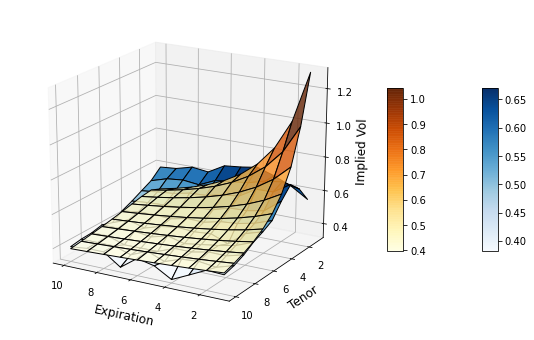

In [15]:
x , y = np.meshgrid(list(range(1, 11)),list(range(1, 11)))
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
surf1 = ax.plot_surface(x, y, market_v, rstride=1, cstride=1,
                cmap='Blues', edgecolor='k')
fig.colorbar(surf1, shrink=0.5, aspect=10)
surf2 = ax.plot_surface(x, y, implied_v, rstride=1, cstride=1,
                cmap='YlOrBr', edgecolor='k', alpha=0.8)
fig.colorbar(surf2, shrink=0.5, aspect=10)
ax.set_xlabel('Expiration',fontsize=12)
ax.set_ylabel('Tenor',fontsize=12)
ax.set_zlabel('Implied Vol',fontsize=12)

elev = 20
azim = 120
ax.view_init(elev, azim)

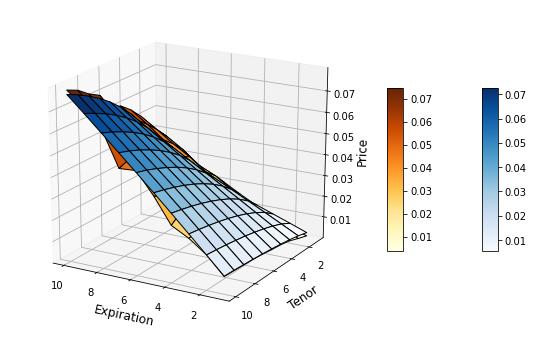

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, model_p, rstride=1, cstride=1,
                cmap='Blues', edgecolor='k')
fig.colorbar(surf, shrink=0.5, aspect=10)
surf = ax.plot_surface(x, y, black_p, rstride=1, cstride=1,
                cmap='YlOrBr', edgecolor='k')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('Expiration',fontsize=12)
ax.set_ylabel('Tenor',fontsize=12)
ax.set_zlabel('Price',fontsize=12)
elev = 20
azim = 120
ax.view_init(elev, azim)

In [17]:
def create_swaption_helpers(data, index, term_structure, engine):
    swaptions = []
    fixed_leg_tenor = Period(1, Years)
    fixed_leg_daycounter = Actual360()
    floating_leg_daycounter = Actual360()
    for d in data:
        vol_handle = QuoteHandle(SimpleQuote(d.volatility))
        helper = SwaptionHelper(Period(d.start, Years),
                                   Period(d.length, Years),
                                   vol_handle,
                                   index,
                                   Period(d.length, Years),
                                   fixed_leg_daycounter,
                                   floating_leg_daycounter,
                                   term_structure
                                   )
        helper.setPricingEngine(engine)
        swaptions.append(helper)
    return swaptions    

In [18]:
model = BlackKarasinski(term_structure);
engine = TreeSwaptionEngine(model, 100)
swaptions = create_swaption_helpers(data, index, term_structure, engine)

optimization_method = LevenbergMarquardt(1.0e-8,1.0e-8,1.0e-8)
end_criteria = EndCriteria(10000, 100, 1e-6, 1e-8, 1e-8)
model.calibrate(swaptions, optimization_method, end_criteria)
a, sigma =  model.params()
print ("a = %6.5f, sigma = %6.5f" % (a, sigma))

a = 0.04509, sigma = 0.80301


In [19]:
model_p = []
market_v = []
black_p = []
implied_v = []

calibration_report(swaptions, data)

----------------------------------------------------------------------------------------------------
    Model Price    Market Price     Implied Vol      Market Vol     Price Error Volatility Diff
----------------------------------------------------------------------------------------------------
        0.00140         0.00143         0.54496         0.55550         0.00003        -0.01054
        0.00335         0.00389         0.52784         0.61860         0.00054        -0.09076
        0.00565         0.00727         0.50617         0.66050         0.00162        -0.15433
        0.00829         0.01150         0.49015         0.69380         0.00322        -0.20365
        0.01106         0.01560         0.47125         0.67810         0.00455        -0.20685
        0.01383         0.02007         0.45114         0.66760         0.00624        -0.21646
        0.01650         0.02312         0.43013         0.61210         0.00662        -0.18197
        0.01905         0.0284

In [20]:
model_p = np.reshape(model_p, (10,10))
market_v = np.reshape(market_v, (10, 10))
black_p = np.reshape(black_p, (10, 10))
implied_v = np.reshape(implied_v, (10, 10))

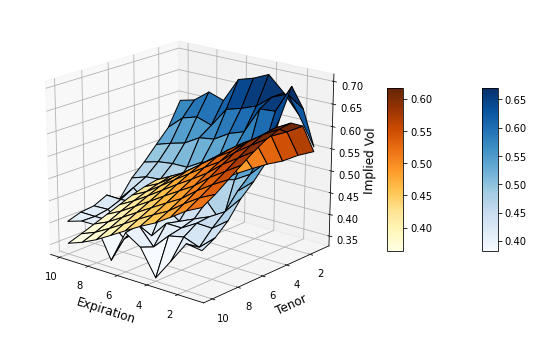

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, market_v, rstride=1, cstride=1,
                cmap='Blues', edgecolor='k')
fig.colorbar(surf, shrink=0.5, aspect=10)
surf = ax.plot_surface(x, y, implied_v, rstride=1, cstride=1,
                cmap='YlOrBr', edgecolor='k')
ax.set_xlabel('Expiration',fontsize=12)
ax.set_ylabel('Tenor',fontsize=12)
ax.set_zlabel('Implied Vol',fontsize=12)
fig.colorbar(surf, shrink=0.5, aspect=10)
elev = 20
azim = 130
ax.view_init(elev, azim)

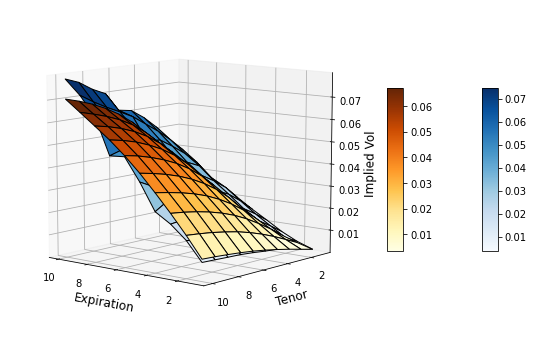

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, black_p, rstride=1, cstride=1,
                cmap='Blues', edgecolor='k')

fig.colorbar(surf, shrink=0.5, aspect=10)
surf = ax.plot_surface(x, y, model_p, rstride=1, cstride=1,
                cmap='YlOrBr', edgecolor='k')

ax.set_xlabel('Expiration',fontsize=12)
ax.set_ylabel('Tenor',fontsize=12)
ax.set_zlabel('Implied Vol',fontsize=12)
fig.colorbar(surf, shrink=0.5, aspect=10)

elev = 10
azim = 130
ax.view_init(elev, azim)